# <center>Metody Numeryczne</center>

# Laboratorium 7: Pierwiastki wielomianu i wartości własne


**Wykonał:** \<Igor Oleksiewicz\>

<br>

### **Metoda zaliczenia:**

Podczas zajęć należy wykonać poniższe polecenia oraz udzielić odpowiedzi na pytania zamieszczone w treści zadań. 

Wszystkie funkcje wymagane w ramach ćwiczenia należy zaimplementować w pliku `main.py`. Poprawność ich działania należy zweryfikować za pomocą testów jednostkowych dostępnych w pliku `test_main.py`.

### **Cel zajęć:**

Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania równań nieliniowych. W związku z tym podczas zajęć będziemy rozważać następujący problem:

Dana jest funkcja $f(x)$. Należy wyznaczyć takie jej argumenty $x^*$, dla których zachodzi równość $f(x^*) = 0$. 

Argumenty spełniające powyższe równanie nazywane są *pierwiastkami równania*.

<br>

**Wielomian**

Dany jest wielomian $w(x)$ w postaci kanonicznej (ogólnej):

$$
w(x) = a_nx^n + a_{n-1}x^{n-1} + \ldots + a_2x^2 + a_1x + a_0
$$

jego wektor współczynników wyraża się wzorem:

$$
\mathbf{a} = (a_0, a_1, ..., a_{n-1}, a_n)
$$


### **Uwagi wstępne:**
- Funkcje wymagające implementacji (lub zaimplementowane na poprzednich laboratoriach) oznaczone są pochyłą czcionką maszynową (np. *`my_func()`*).

- W skrypcie stosuje się następujące skróty:

    - `np` - `numpy`,
    - `sp` - `scipy`,
    - `nppoly` - `numpy.polynomial.polynomial`.

---

In [1]:
!python -m pip install numpy scipy matplotlib

import main

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as nppoly

---

### **Zadanie 1.**

Dane są wielomiany w postaci iloczynowej:
$$
\begin{align*}
w_1(x) &= (x-1)(x-2)(x-3)\\
w_2(x) &= (x-1)(x-2) \cdot \ldots \cdot (x-20)
\end{align*}
$$

**Punkt 1.**

1. Oblicz wektor współczynników $\mathbf{a}_1$ wielomianu $w_1(x)$ w postaci kanonicznej dla zadanego wektora pierwiastków.

2. Sprawdź poprawność wyznaczonego wektora z definicją w sekcji **Cel zajęć**.

> **Wskazówka:** Użyj funkcji [`nppoly.polyfromroots()`](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.polyfromroots.html).

<br>

**Punkt 2.**

Zaimplementuj funkcję *`roots_20()`* wyznaczającą miejsca zerowe wielomianu na podstawie jego wektora współczynników. Funkcja powinna najpierw lekko zaburzać wejściowe współczynniki za pomocą dodania do nich losowej wartości postaci: $N(0,1) \cdot 1\mathrm{e}{-10}$.

> **Wskazówka:** Użyj funkcji [`np.random.random_sample()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.random_sample.html) oraz [`nppoly.polyroots()`](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.polyroots.html).

<br>

**Punkt 3.**

1. Wyznacz wektor współczynników $\mathbf{a}_2$ wielomianu $w_2(x)$.

2. W pętli 20 iteracji:
    
    1. Wyznacz pierwiastki zaburzonego wielomianu używając *`roots_20()`*.

    2. Ustaw zaburzony wektor współczynników jako nowy wektor współczynników.

    3. Wyrysuj na jednym wykresie wyznaczone części rzeczywiste pierwiastków, a na drugim części urojone (w każdej iteracji dorysowuj pierwiastki na tym samym rysunku).

4. Określ, które pierwiastki są najbardziej wrażliwe na zaburzenia oraz opisz wnioski wynikające z utworzonego wykresu.

5. Zaproponuj sposób oszacowania uwarunkowania każdego z pierwiastków.


[[1, 2, 3], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]
Współczynniki wielomianu o pierwiastkach [1, 2, 3]: [-6. 11. -6.  1.]


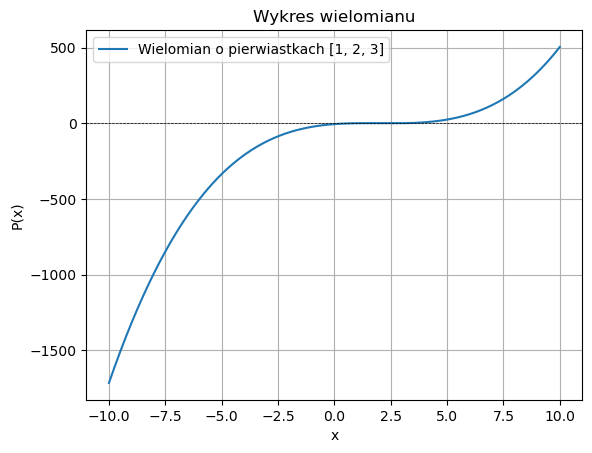

Współczynniki wielomianu o pierwiastkach [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]: [ 2.43290201e+18 -8.75294804e+18  1.38037598e+19 -1.28709312e+19
  8.03781182e+18 -3.59997952e+18  1.20664780e+18 -3.11333643e+17
  6.30308121e+16 -1.01422999e+16  1.30753501e+15 -1.35585183e+14
  1.13102770e+13 -7.56111184e+11  4.01717716e+10 -1.67228082e+09
  5.33279460e+07 -1.25685000e+06  2.06150000e+04 -2.10000000e+02
  1.00000000e+00]


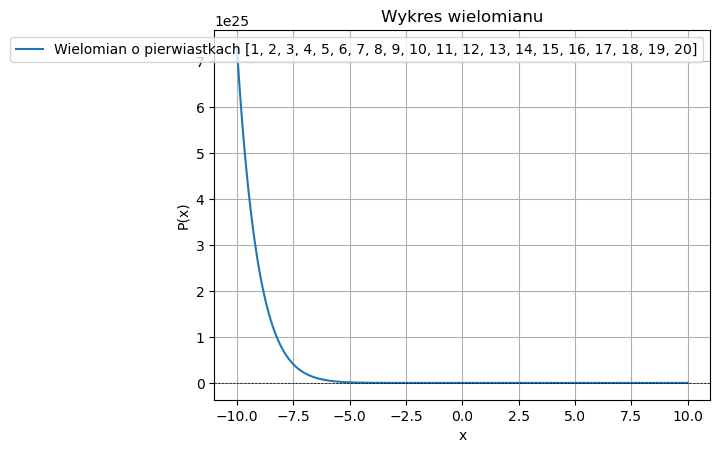

In [2]:
# ===== Twoja implementacja tutaj =====
roots_tab = [[1,2,3],[i for i in range(1,21)]]
print(roots_tab)

for roots in roots_tab:
    p = nppoly.Polynomial.fromroots(roots)
    print(f"Współczynniki wielomianu o pierwiastkach {roots}: {p.coef}")

    # Wykres wielomianu
    x = np.linspace(-10, 10, 400)
    y = p(x)

    plt.figure()
    plt.plot(x, y, label=f'Wielomian o pierwiastkach {roots}')
    plt.axhline(0, color='black', lw=0.5, ls='--')
    plt.title('Wykres wielomianu')
    plt.xlabel('x')
    plt.ylabel('P(x)')
    plt.legend()
    plt.grid()
    plt.show()
    
    
    

In [3]:
def roots_20(coef: np.ndarray) -> tuple[np.ndarray, np.ndarray] | None:
    if not isinstance(coef, np.ndarray) or coef.ndim != 1:
        return None
    
    noise = np.random.random_sample(coef.shape) * 1e-10
    noisy_coef = coef + noise
    roots = nppoly.polyroots(noisy_coef)
    return noisy_coef, roots

[-6. 11. -6.  1.]
1
<class 'numpy.ndarray'>


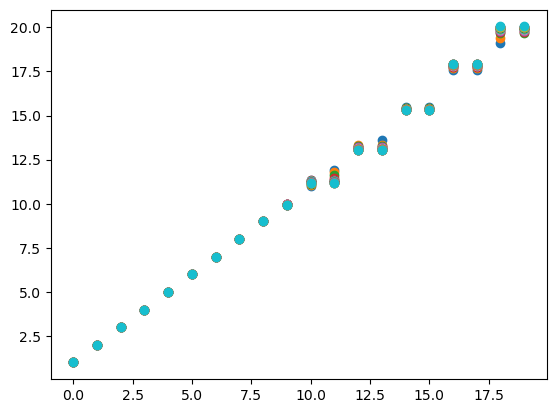

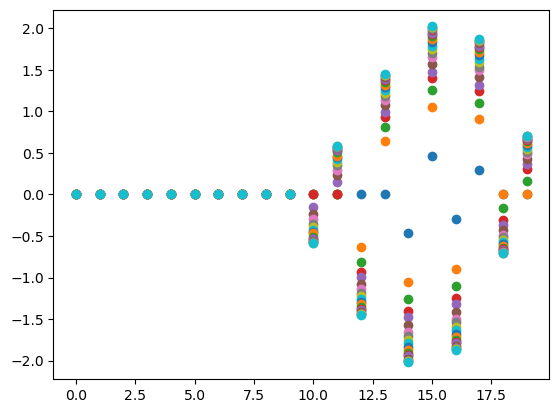

In [4]:
#punkt 3
w1 = [1,2,3]
new_w1 = nppoly.polyfromroots(w1)
print(new_w1)
w2 = np.arange(1,21,1)
new_w2 = nppoly.polyfromroots(w2)
vector_2 = new_w2
print(vector_2.ndim)
print(type(vector_2))
fig, ax = plt.subplots()
fig, ax1 = plt.subplots()
for i in range(20):
    new_vector, new_zeros = roots_20(vector_2)
    vector_2 = new_vector
    ax.plot(np.real(new_zeros),"o")
    ax1.plot(np.imag(new_zeros),"o")
    

Na podstawie kolejnych iteracji obliczania pierwiastków zaburzonego wielomianu widać wyraźnie, że nie wszystkie pierwiastki reagują na perturbacje współczynników w taki sam sposób. Pierwiastki z przedziału od 1 do około 9 praktycznie nie ulegają zmianom – pozostają blisko swoich wartości rzeczywistych i mają część urojoną bliską zeru. Oznacza to, że są dobrze uwarunkowane i odporne na niewielkie zaburzenia.

Znacznie większe odchylenia pojawiają się wśród pierwiastków od około 10 do 20. W tych przypadkach zaburzenia współczynników powodują wyraźne zmiany położenia pierwiastków, szczególnie w części urojonej. Najbardziej niestabilne są pierwiastki znajdujące się na końcu przedziału, czyli 17, 18, 19 i 20. Dla tych wartości obserwujemy największy rozrzut punktów na wykresie, a pierwiastki szybko stają się zespolone. Wynika to z faktu, że dla wyższych wartości indeksu korzenie są bardziej "ściśnięte" i nawet niewielkie zaburzenia współczynników prowadzą do dużych zmian.

Podsumowując: najbardziej wrażliwe na zaburzenia są pierwiastki 17–20, najmniej wrażliwe – pierwiastki 1–9.

---

### **Zadanie 2.**

Na podstawie wiedzy z wykładu wiadomo, że wartości własne macierzy kwadratowej są pierwiastkami wielomianu charakterystycznego tej macierzy oraz, że każdy wielomian posiada swoją macierz stowarzyszoną (macierz Frobeniusa). Wynika z tego, że **poszukiwanie pierwiastków wielomianu jest równoważne poszukiwaniu wartości własnych macierzy stowarzyszonej**.

<br>

Dany jest wielomian:
$$
w_3(x) = (x-1)^8
$$ 

Należy wyznaczyć numerycznie jego miejsca zerowe na różne sposoby i porównać otrzymane wyniki z wartościami analitycznymi.

**Punkt 1.**

Przygotowanie macierzy stowarzyszonej.

1. Zaiplementuj funkcję *`frob_a()`* tworzącą [macierz Frobeniusa](https://en.wikipedia.org/wiki/Companion_matrix) dla zadanego wektora współczynników wielomianu.

2. Wyznacz macierz Frobeniusa $\mathbf{F_{w_3}}$ dla wielomianu $w_3(x)$.

<br>

**Punkt 2.**

Wyznaczenie pierwiastków wielomianu.

1. Wyznacz wartości własne macierzy $\mathbf{F_{w_3}}$ za pomocą funkcji [`np.linalg.eigvals()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eigvals.html).  

2. Dokonaj rozkładu Schura macierzy $\mathbf{F_{w_3}}$ i na tej podstawie wyznacz wartości własne macierzy $\mathbf{F_{w_3}}$. Użyj funkcji [`sp.linalg.schur()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.schur.html).

3. Wyznacz pierwiastki wielomianu $w_3(x)$ przy użyciu funkcji [`nppoly.polyroots()`](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.polyroots.html).

<br>

**Punkt 3.**

Zestawienie wyników.

1. Utwórz wykres typu *scatter plot* i wyrysuj na nim wartości pierwiastków wyznaczonych w **Punkcie 2.** oraz pierwiastki oblicznone analitycznie na płaszczyźnie zespolonej.

2. Opisz wnioski wynikające z wykresu.

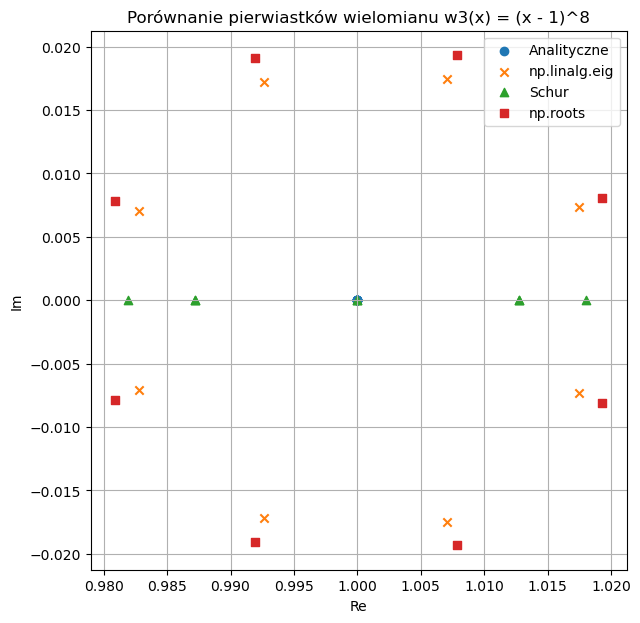

In [ ]:
def frob_a(coef):
    coef = np.array(coef)
    n = len(coef)
    if n < 2 or coef[-1] == 0:
        return None
    F = np.zeros((n-1, n-1))
    for i in range(n-2):
        F[i, i+1] = 1
    for j in range(n-1):
        F[n-2, j] = -coef[j] / coef[-1]
    return F

# Pierwiastki wielomianu
roots_w3 = [1 for _ in range(8)]
coef = np.poly(roots_w3)

# Macierz Frobeniusa
Fw3 = frob_a(coef)

# Metoda 1: eigenvalues
eig_vals = np.linalg.eigvals(Fw3)

# Metoda 2: Schur z scipy.linalg
T, Z = sp.linalg.schur(Fw3)
eig_schur = np.diag(T)

# Metoda 3: polyroots
polyroots = np.roots(coef)

# Pierwiastki analityczne
analytic = np.array([1+0j]*8)

plt.figure(figsize=(7, 7))
plt.scatter(analytic.real, analytic.imag, label="Analityczne", marker='o')
plt.scatter(eig_vals.real, eig_vals.imag, label="np.linalg.eig", marker='x')
plt.scatter(eig_schur.real, eig_schur.imag, label="Schur", marker='^')
plt.scatter(polyroots.real, polyroots.imag, label="np.roots", marker='s')

plt.xlabel("Re")
plt.ylabel("Im")
plt.title("Porównanie pierwiastków wielomianu w3(x) = (x - 1)^8")
plt.grid(True)
plt.legend()
plt.gca().set_aspect('equal', 'box')
plt.show()


Z wykresu wynika, że mimo iż wielomian 
 ma jeden pierwiastek równy 1 o krotności 8, metody numeryczne zwracają wiele różnych, lekko przesuniętych rozwiązań. Świadczy to o bardzo złym uwarunkowaniu problemu i wysokiej wrażliwości na błędy zaokrągleń. Część obliczonych pierwiastków posiada niezerową część urojoną, mimo że rzeczywiste rozwiązanie jest liczbą rzeczywistą. Spośród użytych metod najbardziej stabilne wyniki daje metoda Schura, której pierwiastki leżą najbliżej osi rzeczywistej.

---

### **Zadanie 3.**

Dany jest wielomian:
$$
w_4(x) = 243x^7 - 486x^6 + 783x^5 - 990x^4 + 558x^3 - 28x^2 - 72x + 16
$$ 

1. Wyznacz numerycznie miejsca zerowe wielomianu $w_4(x)$ w sposób analogiczny jak w **Zadaniu 2.**

2. Wyrysuj na płaszczyźnie zespolonej wyznaczone pierwiastki oraz pierwiastki wyliczone analitycznie.

3. Porównaj otrzymane wyniki z rezulatatami otrzymanymi w **Zadaniu 2.**

>**Wskazówka:** Sprawdź poprawność wyznaczonego wektora współczynników z definicją w sekcji **Cel zajęć**.

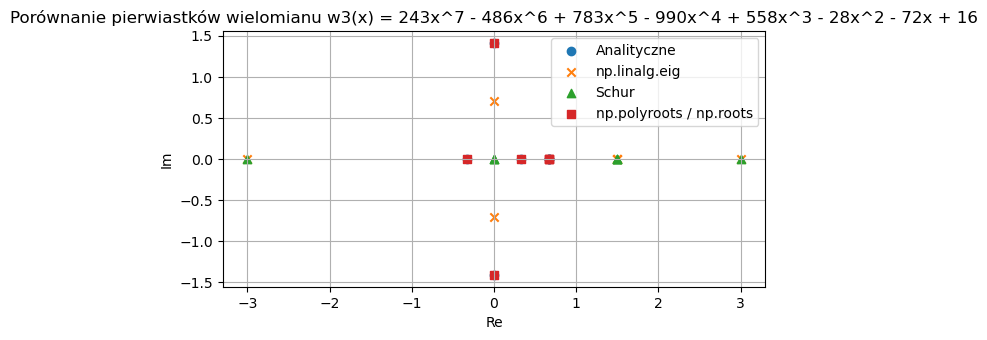

In [10]:
# ===== Twoja implementacja tutaj =====
w4coef = [243, -486,783,-990,558,-28,-72,16]
roots_w4 = np.roots(w4coef)  

# Macierz Frobeniusa 
Fw4 = frob_a(w4coef)
    
# Metoda 1: eigenvalues 
eig_vals = np.linalg.eigvals(Fw4)

#  Metoda 2: Schur 
T, Z = sp.linalg.schur(Fw4)
eig_schur = np.diag(T)

# Metoda 3: polyroots 
polyroots = np.roots(w4coef)

# Pierwiastki analityczne 
analytic = roots_w4

plt.figure(figsize=(7, 7))
plt.scatter(analytic.real, analytic.imag, label="Analityczne", marker='o')
plt.scatter(eig_vals.real, eig_vals.imag, label="np.linalg.eig", marker='x')
plt.scatter(eig_schur.real, eig_schur.imag, label="Schur", marker='^')
plt.scatter(polyroots.real, polyroots.imag, label="np.polyroots / np.roots", marker='s')

plt.xlabel("Re")
plt.ylabel("Im")
plt.title("Porównanie pierwiastków wielomianu w3(x) = 243x^7 - 486x^6 + 783x^5 - 990x^4 + 558x^3 - 28x^2 - 72x + 16")
plt.grid(True)
plt.legend()
plt.gca().set_aspect('equal', 'box')
plt.show()

W zadaniu 2 dla wielomianu 
(𝑥−1)^8
wszystkie pierwiastki teoretycznie pokrywają się w punkcie 
𝑥=1, a metody numeryczne tworzyły sztuczny „rozrzut” wynikający z krotności pierwiastka i niestabilności obliczeń. W obecnym wielomianie stopnia 7 pierwiastki nie są wielokrotne, dlatego metody numeryczne dają wyraźnie lepiej rozdzielone i bardziej realistyczne wyniki. Nadal jednak widać, że metody oparte na wartościach własnych (np. eig) generują większe odchylenia niż stabilniejszy rozkład Schura.

---

### **Zadanie 4.**

Zadanie polega na przeanalizowaniu w jaki sposób różne przekształcenia macierzy wpływają na pojawianie się błędów numerycznych.

W celu przeprowadzenia analizy skonstruuj trzy macierze diagonalne $\mathbf{A}_n$ dla $n = \{10,20,30\}$. Współczynniki macierzy powinny być zdefiniowane jako $a_{ii} = 2^i$ dla $i = \{1,2,...,n\}$ (skorzystaj z funkcji [`np.diag()`](https://numpy.org/doc/stable/reference/generated/numpy.diag.html)).

**Punkt 1.**

1. Dla każdej z macierzy $\mathbf{A}_n$ oblicz wartości własne przy użyciu [`np.linalg.eigvals()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eigvals.html) i porównaj je z wartościami własnymi wyznaczonymi analitycznie.

<br>

**Punkt 2.**

1. Zdefiniuj funcję *`is_nonsingular()`* sprawdzającą czy zadana macierz nie jest singularna. 

2. Skonstruuj losowe niesingularne macierze wektorów własnych $\mathbf{P}_n$, których wartości współczynników są liczbami całkowitymi z zakresu $(0,100)$. Na podstawie macierzy $\mathbf{A}_n$ i $\mathbf{P}_n$ oblicz macierze $\mathbf{B}_n$ postaci: 
$$
\mathbf{B}_n = \mathbf{P}_n\mathbf{A}_n\mathbf{P}_{n}^{-1}
$$ 

3. Oblicz wartości własne macierzy dla uzyskanych macierzy $\mathbf{B}_n$ i porównaj je z wartościami własnymi wyznaczonymi analitycznie.

>**Wskazówka:** Niesingularność macierzy $\mathbf{P}_n$ można zapewnić generując je w pętli, w której warunkiem stopu będzie wynik funkcji zaimplementowanej w **Podpunkcie 1.**

<br>

**Punkt 3.**

1. Bazując na macierzach $\mathbf{P}_n$ wygeneruj macierze ortogonalne $\mathbf{Q}_n$ (można do tego użyć rozkładu QR). Na podstawie macierzy $\mathbf{A}_n$ i $\mathbf{Q}_n$ oblicz macierze $\mathbf{C}_n$ postaci:
$$
\mathbf{C}_n = \mathbf{Q}_n\mathbf{A}_n\mathbf{Q}_{n}^{-1}
$$

2. Oblicz wartości własne macierzy dla uzyskanych macierzy $\mathbf{C}_n$ i porównaj je z wartościami własnymi wyznaczonymi analitycznie.

<br>

**Punkt 4.**

1. Bazując na analitycznych wartościach własnych dla wielomianów charakterystycznych macierzy $\mathbf{A}_n$ wygeneruj macierze Frobeniusa $\mathbf{F}_n$ korzystając z funkcji zaimplementowanej w **Zadaniu 2.** 

2. Oblicz wartości własne macierzy dla uzyskanych macierzy $\mathbf{F}_n$ i porównaj je z wartościami własnymi wyznaczonymi analitycznie.

<br>

**Punkt 5.**

Porównaj wyniki otrzymane we wszystkich punktach. Opisz z czego wynikają powstałe błędy obliczeń.

In [ ]:
# ===== Twoja implementacja tutaj =====
#pk1
sizes = [10, 20, 30]

for n in sizes:
    print(f"\n====== Macierz A_{n} ======")

    diag_values = np.array([2**i for i in range(1, n+1)])

    A = np.diag(diag_values)
    eig_numeric = np.linalg.eigvals(A)
    eig_analytic = diag_values.copy()
    error = eig_numeric - eig_analytic

    print("Analityczne wartości własne:")
    print(eig_analytic)

    print("\nNumeryczne wartości własne (np.linalg.eigvals):")
    print(eig_numeric)

    print("\nBłąd numeryczny (eig_numeric - eig_analytic):")
    print(error)

#pkt2

def is_nonsingular(A: np.ndarray) -> bool | None:
    if not isinstance(A,np.ndarray) or A.ndim != 2:
        return None
    n,m = A.shape
    if n != m:
        return None
    
    detA = np.linalg.det(A)
    eps = np.finfo(float).eps
    return abs(detA) > eps


for n in sizes:
    print(f"\n====== Macierz B_{n} ======")

    #An
    diag_values = np.array([2**i for i in range(1, n+1)])
    A = np.diag(diag_values)

    #Pn
    while True:
        P = np.random.randint(0, 100, size=(n, n)).astype(float)
        if is_nonsingular(P):
            break
    
    # B_n = P A P^{-1}
    P_inv = np.linalg.inv(P)
    B = P @ A @ P_inv

     # Wartości własne B_n
    eig_B = np.linalg.eigvals(B)

    # Analityczne wartości własne
    eig_analytic = diag_values.copy()

    eig_B_s = np.sort_complex(eig_B)
    eig_A_s = np.sort_complex(eig_analytic)
    error_B = np.abs(eig_B_s - eig_A_s)

    print("MAX błąd B_n:", np.max(error_B))
    print("ŚREDNI błąd B_n:", np.mean(error_B))

#pkt3

for n in sizes:
    print(f"\nMacierz C_{n}")

    diag_values = np.array([2**i for i in range(1, n+1)], dtype=float)
    A = np.diag(diag_values)

    # Pn
    while True:
        P = np.random.randint(0, 100, size=(n, n)).astype(float)
        if is_nonsingular(P):
            break

    # QR -> Q ortogonalna
    Q, R = np.linalg.qr(P)

    # C_n = Q A Q^{-1} = Q A Q^T
    C = Q @ A @ Q.T

    # Wartości własne C
    eig_C = np.linalg.eigvals(C)

    eig_analytic = diag_values.copy()
    eig_C_s = np.sort_complex(eig_C)
    eig_A_s = np.sort_complex(eig_analytic)

    error_C = np.abs(eig_C_s - eig_A_s)

    print("MAX błąd C_n:", np.max(error_C))
    print("ŚREDNI błąd C_n:", np.mean(error_C))

#kt4

for n in sizes:
    print(f"\nMacierz Frobeniusa F_{n}")

    diag_values = np.array([2**i for i in range(1, n+1)], dtype=float)

    # Współczynniki
    coef = np.poly(diag_values)

    F = frob_a(coef)

    eig_F = np.linalg.eigvals(F)

    eig_F_s = np.sort_complex(eig_F)
    eig_A_s = np.sort_complex(diag_values)
    error_F = np.abs(eig_F_s - eig_A_s)

    print("MAX błąd F_n:", np.max(error_F))
    print("ŚREDNI błąd F_n:", np.mean(error_F))



====== Macierz A_10 ======
Analityczne wartości własne:
[   2    4    8   16   32   64  128  256  512 1024]

Numeryczne wartości własne (np.linalg.eigvals):
[   2.    4.    8.   16.   32.   64.  128.  256.  512. 1024.]

Błąd numeryczny (eig_numeric - eig_analytic):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

====== Macierz A_20 ======
Analityczne wartości własne:
[      2       4       8      16      32      64     128     256     512
    1024    2048    4096    8192   16384   32768   65536  131072  262144
  524288 1048576]

Numeryczne wartości własne (np.linalg.eigvals):
[2.000000e+00 4.000000e+00 8.000000e+00 1.600000e+01 3.200000e+01
 6.400000e+01 1.280000e+02 2.560000e+02 5.120000e+02 1.024000e+03
 2.048000e+03 4.096000e+03 8.192000e+03 1.638400e+04 3.276800e+04
 6.553600e+04 1.310720e+05 2.621440e+05 5.242880e+05 1.048576e+06]

Błąd numeryczny (eig_numeric - eig_analytic):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

====== Macierz A_30 ======
Analityczne wartości własne:


Wartości własne macierzy diagonalnej Aₙ zostały wyznaczone dokładnie, ponieważ w tym przypadku są one równe elementom na głównej przekątnej. Błąd numeryczny był bliski zeru i wynikał wyłącznie z ograniczonej precyzji obliczeń zmiennoprzecinkowych.

Dla macierzy Bₙ = Pₙ Aₙ Pₙ⁻¹ zauważono większe błędy numeryczne. Wynikają one z faktu, że losowo generowana macierz Pₙ może być źle uwarunkowana, co powoduje wzmacnianie błędów zaokrągleń w trakcie obliczania macierzy odwrotnej oraz dalszych operacji macierzowych.

Macierze Cₙ = Qₙ Aₙ Qₙ⁻¹ dawały wyniki znacznie dokładniejsze niż macierze Bₙ. Wynika to z własności macierzy ortogonalnych, które są dobrze uwarunkowane numerycznie. Ponieważ Qₙ⁻¹ = Qₙᵀ, nie występowały tu problemy związane z niestabilnym obliczaniem odwrotności.

Największe błędy wystąpiły w przypadku macierzy Frobeniusa Fₙ. Ich przyczyną jest sposób konstrukcji – najpierw tworzony jest wielomian charakterystyczny na podstawie pierwiastków, a następnie z jego współczynników budowana jest macierz. W przypadku dużych wartości własnych współczynniki wielomianu przyjmują bardzo duże wartości, co powoduje duże błędy zaokrągleń.

Podsumowując, transformacje ortogonalne są numerycznie najstabilniejsze, transformacje przez losowe macierze wrażliwe na uwarunkowanie, a metoda z macierzą Frobeniusa jest najbardziej podatna na błędy numeryczne.

**Przykładowa forma zestawienia wyników:**
```python
for i, n in enumerate(n_values):
    print(f"   {'Macierz':<18} {'Błąd maksymalny':<18} {'Błąd średni':<18}")
    print(f"   {'-'*55}")
    print(f"   {'A_' + str(n) + ' (diag)':<18} {max_error_A[i]:<18.2e} {mean_error_A[i]:<18.2e}")
    print(f"   {'B_' + str(n) + ' (P*A*P^-1)':<18} {max_error_B[i]:<18.2e} {mean_error_B[i]:<18.2e}")
    print(f"   {'C_' + str(n) + ' (Q*A*Q^T)':<18} {max_error_C[i]:<18.2e} {mean_error_C[i]:<18.2e}")
    print(f"   {'F_' + str(n) + ' (Frobenius)':<18} {max_error_F[i]:<18.2e} {mean_error_F[i]:<18.2e}\n")
```

**Rezultat:**
```md
   Macierz            Błąd maksymalny    Błąd średni       
   -------------------------------------------------------
   A_10 (diag)        0.00e+00           0.00e+00          
   B_10 (P*A*P^-1)    0.00e+00           0.00e+00          
   C_10 (Q*A*Q^T)     0.00e+00           0.00e+00          
   F_10 (Frobenius)   0.00e+00           0.00e+00          

   Macierz            Błąd maksymalny    Błąd średni       
   -------------------------------------------------------
   A_20 (diag)        0.00e+00           0.00e+00          
   B_20 (P*A*P^-1)    0.00e+00           0.00e+00          
   C_20 (Q*A*Q^T)     0.00e+00           0.00e+00          
   F_20 (Frobenius)   0.00e+00           0.00e+00          

   Macierz            Błąd maksymalny    Błąd średni       
   -------------------------------------------------------
   A_30 (diag)        0.00e+00           0.00e+00          
   B_30 (P*A*P^-1)    0.00e+00           0.00e+00          
   C_30 (Q*A*Q^T)     0.00e+00           0.00e+00          
   F_30 (Frobenius)   0.00e+00           0.00e+00
```

---

**Materiały uzupełniające:**
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)